<font color="#483D8B">
<h1  align="center">Basic Linear Regression Analysis on Flight Data</h1>
<h3 align="center"> Ansh Sikka</h3>
<h3 align="center"> 02/19/2019</h3>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from collections import Iterable

## Overview

In this Jupyter Notebook, we examined a dataset with airfare and passenger data and performed multiple linear regression on it to output a model.

## Data

We used airfare data from http://users.stat.ufl.edu/~winner/data/airq402.dat for examination. 
The information in this dataset are below:

Dataset:   airq402.dat

Source: U.S. Department of Transportation

Description: Airfares and passengers for U.S. Domestic Routes for 4th Quarter of 2002.

### Variables/Columns

* City1   1-3
* City2   5-7
* Average Fare    11-17
* Distance      20-23
* Average weekly passengers   26-33
* market leading airline    36-37
* market share     40-45
* Average fare    48-54
* Low price airline   57-58
* market share    61-66
* price     69-75


We import the dataset using pandas and assign it to a dataframe. 
We assume this data is already clean. All we have to do is pre-process the data. 

In [0]:
# load data into pandas dataframe 
with open('airq402.dat', 'r') as datfile:
    df = pd.DataFrame(line.rstrip().split() for line in datfile)

print(df)

      0    1       2     3        4   5      6       7   8      9       10
0    CAK  ATL  114.47   528   424.56  FL  70.19  111.03  FL  70.19  111.03
1    CAK  MCO  122.47   860   276.84  FL  75.10  123.09  DL  17.23  118.94
2    ALB  ATL  214.42   852   215.76  DL  78.89  223.98  CO   2.77  167.12
3    ALB  BWI   69.40   288   606.84  WN  96.97   68.86  WN  96.97   68.86
4    ALB  ORD  158.13   723   313.04  UA  39.79  161.36  WN  15.34  145.42
5    ALB  FLL  135.17  1204   199.02  WN  40.68  137.97  DL  17.09  127.69
6    ALB  LAS  152.85  2237   237.17  WN  59.94  148.59  WN  59.94  148.59
7    ALB  LAX  190.73  2467   191.95  DL  17.89  205.06  US  16.59  174.00
8    ALB  MCO  129.35  1073   550.54  WN  76.84  127.69  WN  76.84  127.69
9    ALB  TPA  134.17  1130   202.93  US  35.40  132.91  DL  26.40  124.78
10   ABQ  ATL  212.49  1269   198.80  DL  68.39  226.79  AA  11.91  200.93
11   ABQ  BWI  173.56  1670   312.39  WN  49.16  180.49  AA  14.37  161.39
12   ABQ  ORD  170.67  11

## Exploratory Data Analysis

### Multiple Linear Regression Using SciKit-Learn

SciKit learn has a linear regression model where you pass in a cleaned data frame and you can train the model based on the given features you want. Since we are doing multiple regression, we will use all the features and have price as the response variable. 


In [0]:
# numeralize categorical data
df[0] = df[0].astype('category')
df[1] = df[1].astype('category')
df[5] = df[5].astype('category')
df[8] = df[8].astype('category')

cat_columns = df.select_dtypes(['category']).columns

cat_columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df[:10]

,0,1,2,3,4,5,6,7,8,9,10
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42
5,2,18,135.17,1204,199.02,14,40.68,137.97,6,17.09,127.69
6,2,32,152.85,2237,237.17,14,59.94,148.59,17,59.94,148.59
7,2,33,190.73,2467,191.95,4,17.89,205.06,16,16.59,174.00
8,2,40,129.35,1073,550.54,14,76.84,127.69,17,76.84,127.69
9,2,82,134.17,1130,202.93,13,35.40,132.91,6,26.40,124.78


#### Interpretation
Since we can't use strings in a mathematical linear regression model, we will have to convert them into a numerical value. Pandas dataframes have a feature that easily allows us to process and convert the data into numerical values. We could just ignore these categorical values, but they can be really valuable to the response variable. 

In [0]:
# extract and seperate training data (columns 0-9)
airline_data_X = df[[i for i in range (0, 10)]]

# extract pricing data
airline_data_Y = df[[10]]

# setup train_x, test_x, train_y, test_y

# train with the first 100 rows
airline_data_train_x = airline_data_X[:100]
airline_data_test_x = airline_data_X[-100:]

airline_data_train_y = airline_data_Y[:100]
airline_data_test_y = airline_data_Y[-100:]

# instantiate scikit-learn's linear regression system
regr = linear_model.LinearRegression()

         10
900  257.23
901  251.02
902  265.46
903  129.96
904  138.56
905  211.30
906  123.69
907  156.16
908  144.11
909  105.29
910  106.89
911  147.61
912  105.37
913  141.61
914   68.86
915  120.29
916  101.76
917   79.26
918  125.27
919  130.11
920  156.80
921  139.41
922  247.91
923  227.69
924  131.36
925  135.82
926   76.21
927   81.40
928  171.01
929  102.53
..      ...
970  105.36
971   97.48
972  268.78
973  160.60
974  169.59
975  191.34
976  102.68
977   79.37
978  149.91
979  165.25
980   73.10
981  241.30
982  119.80
983  109.45
984  200.96
985  182.66
986   76.66
987  103.02
988  143.53
989  172.45
990  100.08
991   66.32
992  141.21
993  126.38
994  252.34
995  118.51
996   82.55
997  159.02
998   73.44
999  121.94

[100 rows x 1 columns]


#### Interpretation
We have to split the data to get the model weights. We need input variables (X) and a response variable (Y). Here, we are taking the first 9 columns with the input variables and seperating it from the response variable Y. 

In [0]:
regr.fit(airline_data_train_x, airline_data_train_y)
airline_data_pred_y = regr.predict(airline_data_test_x) # we don't need this but it helps us test accuracy

In [0]:
# flatten predicted list
pred_y = [i[0] for i in airline_data_pred_y]

# convert from dataframe to array
act = airline_data_test_y.values
actual_y = [float(i[0]) for i in act]

x_act = airline_data_test_x.values
actual_x = [float(i[0]) for i in x_act]

In [0]:
min_actual_y = min(actual_y)
min_pred_y = min(pred_y)

max_actual_y = max(actual_y)
max_pred_y = max(pred_y)

min_y = min(min_actual_y, min_pred_y)
max_y = max(max_actual_y, max_pred_y)

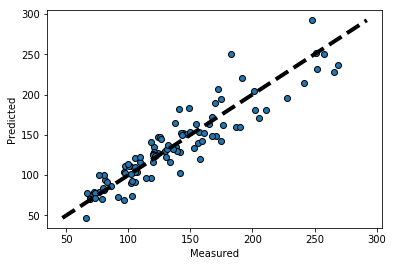

In [0]:
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(actual_y, pred_y, edgecolors=(0, 0, 0))
ax.plot([min_y, max_y], [min_y, max_y], 'k--', lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

#### Interpretation
We are fitting the data to a multiple linear regression model using the data that we just split from our dataframe. 

In [0]:
print('Coefficients: \n', regr.coef_)
    

Coefficients: 
 [[-6.14677709e-02  7.85130793e-02  1.60748030e+00  2.88652983e-03
   8.66471790e-04  2.82493037e-01 -4.84071918e-01 -7.91423969e-01
  -1.24145173e+00  4.54950442e-01]]


#### Interpretation
As we can see, the third column (average price) has the highest weight out of all of them, showing that this column brings the biggest impact in determining and predicting prices. 

In [0]:
# Mean squared derror
print("Mean squared error: %.2f" % mean_squared_error(airline_data_test_y, airline_data_pred_y))

Mean squared error: 373.42


In [0]:
print('Variance score: %.2f' % r2_score(airline_data_test_y, airline_data_pred_y))

Variance score: 0.84


#### Interpretation
Since our variance score is significantly high, we can easily say that the data is mostly correctly fitted for this regression model. We can make some modifications such as removing insignificant input variables in X. 

## Conclusion
In this Jupyter Notebook, we

* Loaded a .dat dataset file into a pandas dataframe
* Integrated and processed data with categorical values to numerial values
* Split data into X_Train, Y_Train, X_Test, and Y_Test
* Fitted the model with the given training data
* Analyzed the statistics outputted from the trained model

From this, it was learned that every feature in this dataset contributed a decent weight to the final price response variable. However, the largest contributor was the average price input variable. This means a lot of the given price for each airline ticket was based on the average price. The variance score of 0.84 showed that the regression score was close to 1, which means our data was fitted significantly well. There might have been some lurking variables that can cause the data to not properly fit. Possibly applying polynomials into the equation or remove insignificant variables would fit the data better. Overall, this model did fit just fine. 